#### 아래의 범죄에 대해 '성범죄 전체' 항목으로 묶어 처리.
> '강력범죄(소계)', '강간', '강간·강제추행' '강도', '강제추행', '기타(강간·강제추행등)'.

> 참고로 2011년과 2012년의 '강간·강제추행' 항목은 2013년 이후 '기타(강간·강제추행등)' 항목으로 바뀌었음.

#### 아래 항목에 대해서는 '정신 불안정' 항목으로 묶어 처리.
> '정신이상', '정신박약', '기타정신장애'.


#### 아래의 없는 자료에 대해서는 0으로 처리.
> 2011년, 2012년: '강간', '강제추행', '기타' 범죄의 범죄자 수.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 적용
from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
crime_mental = pd.read_csv('범죄자_성별과정신상태.csv', thousands=',', encoding='euc-kr', header=3)
crime_mental.head()

,No,자료시점,분류,분류.1,원자료,원자료.1,원자료.2,원자료.3,원자료.4,원자료.5,원자료.6,원자료.7,원자료.8,원자료.9,원자료.10,원자료.11,원자료.12,원자료.13,원자료.14,원자료.15
0,1,2011년,총계,총계,1815233.0,1484584.0,1088293.0,1647.0,415.0,2182.0,392047.0,NaN,330649.0,289969.0,473.0,95.0,725.0,39132.0,255.0,NaN
1,2,2011년,강력범죄,강력범죄(소계),25346.0,24210.0,16596.0,124.0,62.0,251.0,7177.0,NaN,1136.0,903.0,39.0,3.0,30.0,160.0,1.0,NaN
2,3,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011년,강력범죄,강간·강제추행,17652.0,17388.0,11671.0,48.0,50.0,142.0,5477.0,NaN,264.0,222.0,1.0,0.0,0.0,41.0,0.0,NaN
4,5,2011년,강력범죄,강제추행,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
crime_mental.columns = ['No', '시점', '대분류', '범죄 분류', '총계', 
                        '남자(소계)', '남자(정상)', '남자(정신이상)', '남자(정신박약)', 
                        '남자(기타정신장애)', '남자(주취)', '남자(미상)', 
                        '여자(소계)', '여자(정상)', '여자(정신이상)', '여자(정신박약)', 
                        '여자(기타정신장애)', '여자(주취)', '여자(월경시이상)', '여자(미상)']

crime_mental.head()

,No,시점,대분류,범죄 분류,총계,남자(소계),남자(정상),남자(정신이상),남자(정신박약),남자(기타정신장애),남자(주취),남자(미상),여자(소계),여자(정상),여자(정신이상),여자(정신박약),여자(기타정신장애),여자(주취),여자(월경시이상),여자(미상)
0,1,2011년,총계,총계,1815233.0,1484584.0,1088293.0,1647.0,415.0,2182.0,392047.0,NaN,330649.0,289969.0,473.0,95.0,725.0,39132.0,255.0,NaN
1,2,2011년,강력범죄,강력범죄(소계),25346.0,24210.0,16596.0,124.0,62.0,251.0,7177.0,NaN,1136.0,903.0,39.0,3.0,30.0,160.0,1.0,NaN
2,3,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011년,강력범죄,강간·강제추행,17652.0,17388.0,11671.0,48.0,50.0,142.0,5477.0,NaN,264.0,222.0,1.0,0.0,0.0,41.0,0.0,NaN
4,5,2011년,강력범죄,강제추행,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crime_mental.set_index('범죄 분류', drop=True, append=False, inplace=True)
crime_mental.drop(['No', '대분류', '총계'], axis=1, inplace=True)
crime_mental.drop(['총계'], axis=0, inplace=True)

crime_mental = crime_mental.fillna(0)
crime_mental.head()

,시점,남자(소계),남자(정상),남자(정신이상),남자(정신박약),남자(기타정신장애),남자(주취),남자(미상),여자(소계),여자(정상),여자(정신이상),여자(정신박약),여자(기타정신장애),여자(주취),여자(월경시이상),여자(미상)
범죄 분류,,,,,,,,,,,,,,,,
강력범죄(소계),2011년,24210.0,16596.0,124.0,62.0,251.0,7177.0,0.0,1136.0,903.0,39.0,3.0,30.0,160.0,1.0,0.0
강간,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,17388.0,11671.0,48.0,50.0,142.0,5477.0,0.0,264.0,222.0,1.0,0.0,0.0,41.0,0.0,0.0
강제추행,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
crime_mental['남자(정신 불안정)'] = crime_mental.iloc[:,3:6].sum(axis=1)
crime_mental['여자(정신 불안정)'] = crime_mental.iloc[:,10:13].sum(axis=1)

crime_mental.head()

,시점,남자(소계),남자(정상),남자(정신이상),남자(정신박약),남자(기타정신장애),남자(주취),남자(미상),여자(소계),여자(정상),여자(정신이상),여자(정신박약),여자(기타정신장애),여자(주취),여자(월경시이상),여자(미상),남자(정신 불안정),여자(정신 불안정)
범죄 분류,,,,,,,,,,,,,,,,,,
강력범죄(소계),2011년,24210.0,16596.0,124.0,62.0,251.0,7177.0,0.0,1136.0,903.0,39.0,3.0,30.0,160.0,1.0,0.0,437.0,72.0
강간,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,17388.0,11671.0,48.0,50.0,142.0,5477.0,0.0,264.0,222.0,1.0,0.0,0.0,41.0,0.0,0.0,240.0,1.0
강제추행,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
crime_mental.drop(crime_mental.columns[[3, 4, 5, 10, 11, 12]], axis=1, inplace=True)
crime_mental = crime_mental[['시점', '남자(소계)', '남자(정상)', '남자(정신 불안정)', '남자(주취)', '남자(미상)', 
                            '여자(소계)', '여자(정상)', '여자(정신 불안정)', '여자(주취)', '여자(월경시이상)', '여자(미상)']]
crime_mental.head(10)

,시점,남자(소계),남자(정상),남자(정신 불안정),남자(주취),남자(미상),여자(소계),여자(정상),여자(정신 불안정),여자(주취),여자(월경시이상),여자(미상)
범죄 분류,,,,,,,,,,,,
강력범죄(소계),2011년,24210.0,16596.0,437.0,7177.0,0.0,1136.0,903.0,72.0,160.0,1.0,0.0
강간,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,17388.0,11671.0,240.0,5477.0,0.0,264.0,222.0,1.0,41.0,0.0,0.0
강제추행,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강력범죄(소계),2012년,22819.0,10749.0,450.0,7230.0,4390.0,970.0,552.0,52.0,175.0,0.0,191.0
강간,2012년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2012년,17641.0,7545.0,305.0,5801.0,3990.0,371.0,199.0,1.0,61.0,0.0,110.0
강제추행,2012년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 띄어쓰기

In [7]:
crime_mental_2011 = crime_mental[:5]
crime_mental_2012 = crime_mental[5:10]
crime_mental_2013 = crime_mental[10:15]
crime_mental_2014 = crime_mental[15:20]
crime_mental_2015 = crime_mental[20:25]
crime_mental_2016 = crime_mental[25:30]
crime_mental_2017 = crime_mental[30:35]
crime_mental_2018 = crime_mental[35:]

crime_mental_2018

,시점,남자(소계),남자(정상),남자(정신 불안정),남자(주취),남자(미상),여자(소계),여자(정상),여자(정신 불안정),여자(주취),여자(월경시이상),여자(미상)
범죄 분류,,,,,,,,,,,,
강력범죄(소계),2018년,27114.0,11712.0,572.0,9111.0,5719.0,1188.0,537.0,67.0,260.0,0.0,324.0
강간,2018년,5858.0,2313.0,23.0,1473.0,2049.0,89.0,44.0,0.0,14.0,0.0,31.0
강간·강제추행,2018년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강제추행,2018년,17068.0,7304.0,364.0,6272.0,3128.0,563.0,229.0,10.0,123.0,0.0,201.0
기타(강간·강제추행등),2018년,449.0,230.0,9.0,137.0,73.0,9.0,4.0,0.0,2.0,0.0,3.0


In [8]:
crime_mental_2011.loc['성범죄 전체'] = crime_mental_2011.sum(axis=0)
crime_mental_2011.loc['성범죄 전체', '시점'] = '2011년'

crime_mental_2012.loc['성범죄 전체'] = crime_mental_2012.sum(axis=0)
crime_mental_2012.loc['성범죄 전체', '시점'] = '2012년'

crime_mental_2013.loc['성범죄 전체'] = crime_mental_2013.sum(axis=0)
crime_mental_2013.loc['성범죄 전체', '시점'] = '2013년'

crime_mental_2014.loc['성범죄 전체'] = crime_mental_2014.sum(axis=0)
crime_mental_2014.loc['성범죄 전체', '시점'] = '2014년'

crime_mental_2015.loc['성범죄 전체'] = crime_mental_2015.sum(axis=0)
crime_mental_2015.loc['성범죄 전체', '시점'] = '2015년'

crime_mental_2016.loc['성범죄 전체'] = crime_mental_2016.sum(axis=0)
crime_mental_2016.loc['성범죄 전체', '시점'] = '2016년'

crime_mental_2017.loc['성범죄 전체'] = crime_mental_2017.sum(axis=0)
crime_mental_2017.loc['성범죄 전체', '시점'] = '2017년'

crime_mental_2018.loc['성범죄 전체'] = crime_mental_2018.sum(axis=0)
crime_mental_2018.loc['성범죄 전체', '시점'] = '2018년'

crime_mental_2014

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,시점,남자(소계),남자(정상),남자(정신 불안정),남자(주취),남자(미상),여자(소계),여자(정상),여자(정신 불안정),여자(주취),여자(월경시이상),여자(미상)
범죄 분류,,,,,,,,,,,,
강력범죄(소계),2014년,24183.0,11591.0,602.0,8596.0,3394.0,882.0,464.0,52.0,154.0,0.0,212.0
강간,2014년,5446.0,2475.0,45.0,1653.0,1273.0,71.0,48.0,0.0,8.0,0.0,15.0
강간·강제추행,2014년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강제추행,2014년,13155.0,6088.0,341.0,5157.0,1569.0,245.0,100.0,5.0,40.0,0.0,100.0
기타(강간·강제추행등),2014년,1171.0,612.0,28.0,393.0,138.0,22.0,15.0,0.0,1.0,0.0,6.0
성범죄 전체,2014년,43955.0,20766.0,1016.0,15799.0,6374.0,1220.0,627.0,57.0,203.0,0.0,333.0


# 시각화

## 남자 정신상태별

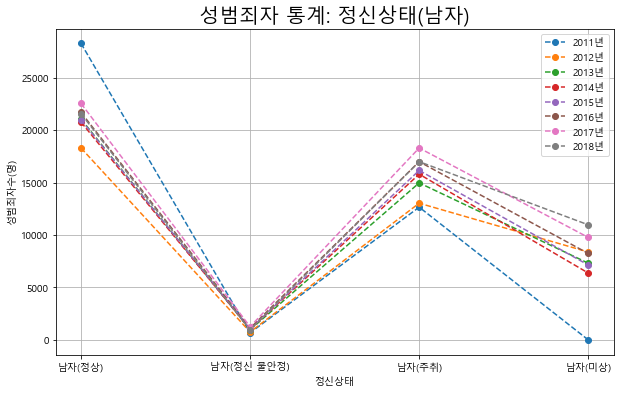

In [9]:
x = ['남자(정상)', '남자(정신 불안정)', '남자(주취)', '남자(미상)']

y1 = crime_mental_2011.loc['성범죄 전체'][2:6]
y2 = crime_mental_2012.loc['성범죄 전체'][2:6]
y3 = crime_mental_2013.loc['성범죄 전체'][2:6]
y4 = crime_mental_2014.loc['성범죄 전체'][2:6]
y5 = crime_mental_2015.loc['성범죄 전체'][2:6]
y6 = crime_mental_2016.loc['성범죄 전체'][2:6]
y7 = crime_mental_2017.loc['성범죄 전체'][2:6]
y8 = crime_mental_2018.loc['성범죄 전체'][2:6]


plt.figure(figsize=(10,6))
plt.title('성범죄자 통계: 정신상태(남자)', size=20)
plt.xlabel('정신상태')
plt.ylabel('성범죄자수(명)')
plt.grid()


plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')

plt.legend()

plt.show()

## 여자 정신상태별

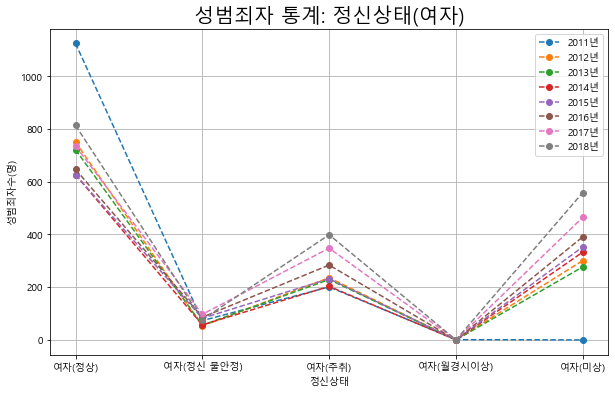

In [10]:
x1 = ['여자(정상)', '여자(정신 불안정)', '여자(주취)', '여자(월경시이상)', '여자(미상)']

y11 = crime_mental_2011.loc['성범죄 전체'][7:]
y12 = crime_mental_2012.loc['성범죄 전체'][7:]
y13 = crime_mental_2013.loc['성범죄 전체'][7:]
y14 = crime_mental_2014.loc['성범죄 전체'][7:]
y15 = crime_mental_2015.loc['성범죄 전체'][7:]
y16 = crime_mental_2016.loc['성범죄 전체'][7:]
y17 = crime_mental_2017.loc['성범죄 전체'][7:]
y18 = crime_mental_2018.loc['성범죄 전체'][7:]


plt.figure(figsize=(10,6))
plt.title('성범죄자 통계: 정신상태(여자)', size=20)
plt.xlabel('정신상태')
plt.ylabel('성범죄자수(명)')
plt.grid()


plt.plot(x1, y11, label='2011년', marker='o', linestyle='dashed')
plt.plot(x1, y12, label='2012년', marker='o', linestyle='dashed')
plt.plot(x1, y13, label='2013년', marker='o', linestyle='dashed')
plt.plot(x1, y14, label='2014년', marker='o', linestyle='dashed')
plt.plot(x1, y15, label='2015년', marker='o', linestyle='dashed')
plt.plot(x1, y16, label='2016년', marker='o', linestyle='dashed')
plt.plot(x1, y17, label='2017년', marker='o', linestyle='dashed')
plt.plot(x1, y18, label='2018년', marker='o', linestyle='dashed')

plt.legend()

plt.show()

## 성별, 정신상태별

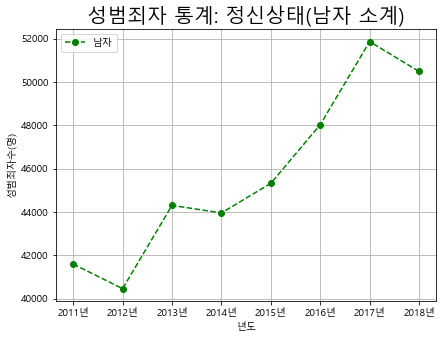

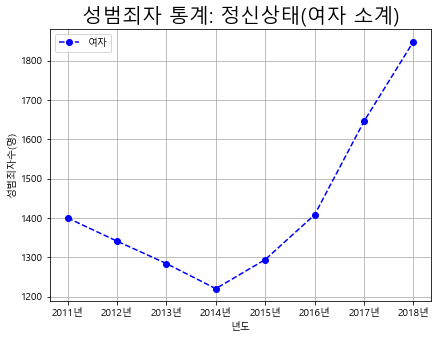

In [11]:
x2 = ['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']

y21 = [crime_mental_2011.loc['성범죄 전체'][1], 
       crime_mental_2012.loc['성범죄 전체'][1], 
       crime_mental_2013.loc['성범죄 전체'][1], 
       crime_mental_2014.loc['성범죄 전체'][1], 
       crime_mental_2015.loc['성범죄 전체'][1], 
       crime_mental_2016.loc['성범죄 전체'][1], 
       crime_mental_2017.loc['성범죄 전체'][1], 
       crime_mental_2018.loc['성범죄 전체'][1]]

plt.figure(figsize=(15,5)).add_subplot(1, 2, 1)
plt.title('성범죄자 통계: 정신상태(남자 소계)', size=20)
plt.xlabel('년도')
plt.ylabel('성범죄자수(명)')
plt.grid()


plt.plot(x2, y21, label='남자', marker='o', linestyle='dashed', color='g')
plt.legend()

####################################################################

x3 = ['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']

y31 = [crime_mental_2011.loc['성범죄 전체'][6], 
       crime_mental_2012.loc['성범죄 전체'][6], 
       crime_mental_2013.loc['성범죄 전체'][6], 
       crime_mental_2014.loc['성범죄 전체'][6], 
       crime_mental_2015.loc['성범죄 전체'][6], 
       crime_mental_2016.loc['성범죄 전체'][6], 
       crime_mental_2017.loc['성범죄 전체'][6], 
       crime_mental_2018.loc['성범죄 전체'][6]]

plt.figure(figsize=(15,5)).add_subplot(1, 2, 2)
plt.title('성범죄자 통계: 정신상태(여자 소계)', size=20)
plt.xlabel('년도')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x3, y31, label='여자', marker='o', linestyle='dashed', color='b')
plt.legend()

plt.show()